This notebook computes the beam solar radiation for a day for three locations in The Netherlands by using the solarpy library. These three locations are weather stations. The goal is to compare the computed values with ground truth global solar radiation values measured by the weather stations.

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import solarpy as sp
from datetime import datetime, timedelta, time

In [3]:
# Setting the parameters
date = dt.datetime(2022, 7, 1)

# List the parameters of the weather stations:
# (height (in m), latitude (in degrees))
ws1 = (0, 52.139722)        # Voorschoten
ws2 = (14, 51.530278)       # Wilhelminadorp
ws3 = (0.9, 53.194444)      # Nieuw Beerta

In [4]:
# Compute the beam solar radiation for the weather stations per 10 minutes
t = [date + dt.timedelta(minutes=i) for i in range(0, 60 * 24, 10)]

G_ws1 = [(sp.beam_irradiance(ws1[0], i, ws1[1])) for i in t]    # Voorschoten
G_ws2 = [(sp.beam_irradiance(ws2[0], i, ws2[1])) for i in t]    # Wilhelminadorp
G_ws3 = [(sp.beam_irradiance(ws3[0], i, ws3[1])) for i in t]    # Nieuw Beerta

In [5]:
# Adjust the timestamps to make them plottable.
t_ = [datetime.combine(datetime(2022, 7, 1), i) for i in [i.time() for i in t]] 

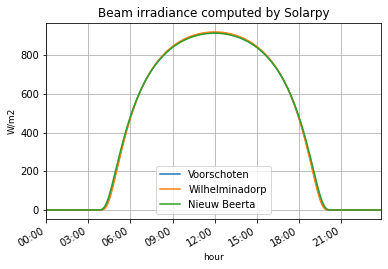

In [6]:
# Plot the computed values of the three weather stations in one graph
fig, ax = plt.subplots()
ax.plot(t_, G_ws1, label='Voorschoten')
ax.plot(t_, G_ws2, label='Wilhelminadorp')
ax.plot(t_, G_ws3, label='Nieuw Beerta')

fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.autoscale(enable=True, axis='x', tight=True)

plt.xlabel('hour', fontsize=9)
plt.ylabel('W/m2', fontsize=9)
plt.title('Beam irradiance computed by Solarpy', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

***Reading raw weather data***

In [7]:
# Read the weather file and save data per weather station for one day (01-07-2022).
with open('data/weather_data/kis_tos_20220731.txt') as file:
    lines = file.readlines()

    Q_Glob_Vs = []
    Q_Glob_Wd = []
    Q_Glob_Nb = []

    # Extract the global radiation for Voorschoten
    i = 0
    for line in lines:
        if line[0] == '#':
            continue
        
        line_spl = line.split()

        if line_spl[3] == 'Voorschoten':
            date = line_spl[0]
            time = line_spl[1]
            location_id = line_spl[2]
            location_name = line_spl[3] + " " + line_spl[4]
            lat = line_spl[5]
            lon = line_spl[6]
            altitude = line_spl[7]
            Q_Glob_10 = line_spl[8]
            QN_Glob_10 = line_spl[9]
            QX_Glob_10 = line_spl[10]
            S_dur = line_spl[11]
        
            Q_Glob_Vs.append(float(Q_Glob_10))

            i += 1
            if i > 143: # take a whole day with time intervals of 10 min
                break

    # Extract the global radiation for Wilhelminadorp    
    i = 0
    for line in lines:
        if line[0] == '#':
            continue
        
        line_spl = line.split()

        if line_spl[3] == 'Wilhelminadorp':
            date = line_spl[0]
            time = line_spl[1]
            location_id = line_spl[2]
            location_name = line_spl[3]
            lat = line_spl[4]
            lon = line_spl[5]
            altitude = line_spl[6]
            Q_Glob_10 = line_spl[7]
            QN_Glob_10 = line_spl[8]
            QX_Glob_10 = line_spl[9]
            S_dur = line_spl[10]
        
            # print("Split:", date, time, location_id, location_name, lat, lon, altitude, Q_Glob_10, QN_Glob_10, QX_Glob_10, S_dur)

            Q_Glob_Wd.append(float(Q_Glob_10))

            i += 1
            if i > 143: # take a whole day with time intervals of 10 min
                break
    
    # Extract the global radiation for Nieuw Beerta
    i = 0
    for line in lines:
        if line[0] == '#':
            continue
        
        line_spl = line.split()

        if line_spl[3] == 'Nieuw':
            date = line_spl[0]
            time = line_spl[1]
            location_id = line_spl[2]
            location_name = line_spl[3] + " " + line_spl[4]
            lat = line_spl[5]
            lon = line_spl[6]
            altitude = line_spl[7]
            Q_Glob_10 = line_spl[8]
            QN_Glob_10 = line_spl[9]
            QX_Glob_10 = line_spl[10]
            S_dur = line_spl[11]
        
            # print("Split:", date, time, location_id, location_name, lat, lon, altitude, Q_Glob_10, QN_Glob_10, QX_Glob_10, S_dur)

            Q_Glob_Nb.append(float(Q_Glob_10))

            i += 1
            if i > 143: # take a whole day with time intervals of 10 min
                break
    
    # print(Q_Glob_Vs)
    # print(Q_Glob_Wd)
    # print(Q_Glob_Nb)

***Plotting the graphs showing the computed radiation and the ground truth radiation***

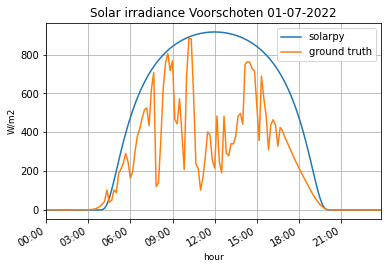

In [13]:
# Plot graph of Voorschoten (solarpy vs ground truth)
fig, ax = plt.subplots()
ax.plot(t_, G_ws1, label='solarpy')
ax.plot(t_, Q_Glob_Vs, label='ground truth')

fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.autoscale(enable=True, axis='x', tight=True)

plt.xlabel('hour', fontsize=9)
plt.ylabel('W/m2', fontsize=9)
plt.title('Solar irradiance Voorschoten 01-07-2022', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

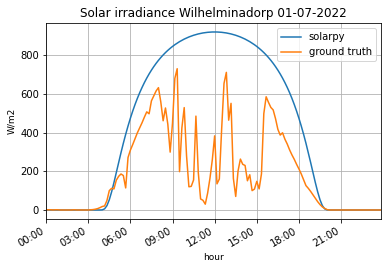

In [14]:
# Plot graph of Wilhelminadorp (solarpy vs ground truth)
fig, ax = plt.subplots()
ax.plot(t_, G_ws2, label='solarpy')
ax.plot(t_, Q_Glob_Wd, label='ground truth')

fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.autoscale(enable=True, axis='x', tight=True)

plt.xlabel('hour', fontsize=9)
plt.ylabel('W/m2', fontsize=9)
plt.title('Solar irradiance Wilhelminadorp 01-07-2022', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

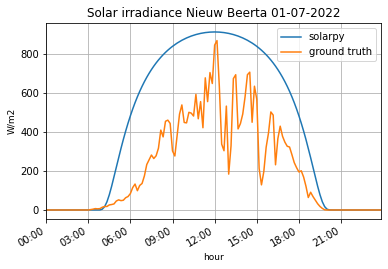

In [15]:
# Plot graph of Nieuw Beerta (solarpy vs ground truth)
fig, ax = plt.subplots()
ax.plot(t_, G_ws3, label='solarpy')
ax.plot(t_, Q_Glob_Nb, label='ground truth')

fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.autoscale(enable=True, axis='x', tight=True)

plt.xlabel('hour', fontsize=9)
plt.ylabel('W/m2', fontsize=9)
plt.title('Solar irradiance Nieuw Beerta 01-07-2022', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()